In [1]:
import sys
sys.path.append(r"C:\Users\Lenovo\Desktop\ReadyAssist Assessment\Assessment")

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Import your own functions
from methods.preprocessing import convert_to_datetime
from methods.encoding import encode_category,encode_entity

In [3]:
train_df=pd.read_csv('final_Training.csv')
test_df=pd.read_csv(r'C:\Users\Lenovo\Desktop\ReadyAssist Assessment\Assessment\Datasets\GUIDE_Test.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12120\1901134813.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df=pd.read_csv(r'C:\Users\Lenovo\Desktop\ReadyAssist Assessment\Assessment\Datasets\GUIDE_Test.csv')


### Explanation of the Code

The following code is used to sample a subset of the training dataset (`train_df`) to make the training process more efficient and manageable. Here's the breakdown:

```python
sampled_df, _ = train_test_split(
    train_df,
    stratify=train_df['IncidentGrade_encoded'],
    train_size=15000,
    random_state=42
)
```

1. **Purpose**: 
   - The dataset `train_df` is very large, containing over 9 million rows. Training machine learning models on such a large dataset can be computationally expensive and time-consuming. By sampling a smaller subset of the data, we reduce the computational load and make the training process faster and easier.

2. **`train_test_split`**:
   - This function is typically used to split a dataset into training and testing sets. Here, it is being used to sample a subset of the data.

3. **Parameters**:
   - `train_df`: The original training dataset.
   - `stratify=train_df['IncidentGrade_encoded']`: Ensures that the sampled subset maintains the same distribution of the `IncidentGrade_encoded` column as the original dataset. This is important to preserve the class balance in the sampled data.
   - `train_size=15000`: Specifies that the sampled subset should contain 15,000 rows.
   - `random_state=42`: Ensures reproducibility of the sampling process by setting a fixed random seed.

4. **Output**:
   - `sampled_df`: The sampled subset of the training dataset, containing 15,000 rows.
   - `_`: The second output (not used here) would contain the remaining data not included in the sample.

By working with a smaller, representative subset of the data, we make the training process more efficient while still retaining the essential characteristics of the original dataset.
```

In [4]:
sampled_df, _ = train_test_split(
    train_df,
    stratify=train_df['IncidentGrade_encoded'],
    train_size=15000,
    random_state=42
)

In [5]:
sampled_df

,Unnamed: 0,DetectorId,AlertTitle,DeviceId,OSFamily,CountryCode,day,month,year,hour,weekday,Category_encoded,IncidentGrade_encoded,Entity_encoded
3722625,3742741,20,3488,98799,5,242,10,6,2024,14,0,2,0,1
4903103,4929740,37,14028,98799,5,242,10,6,2024,20,0,2,1,2
2224698,2236739,15,13,98799,5,242,3,6,2024,18,0,2,1,2
858648,863214,3,4,98799,5,242,11,6,2024,3,1,1,1,2
5825258,5856787,100,77,98799,5,0,30,5,2024,13,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321555,7361287,1,1,98799,5,242,4,6,2024,20,1,1,1,2
4799168,4825213,4,3,98799,5,242,8,6,2024,20,5,1,2,1
5407888,5437182,413,9080,98799,5,242,7,6,2024,12,4,2,0,2
6400834,6435501,1,1,98799,5,242,14,6,2024,15,4,1,0,1


In [6]:
sampled_df=sampled_df.iloc[:,1:]

In [7]:
sampled_df

,DetectorId,AlertTitle,DeviceId,OSFamily,CountryCode,day,month,year,hour,weekday,Category_encoded,IncidentGrade_encoded,Entity_encoded
3722625,20,3488,98799,5,242,10,6,2024,14,0,2,0,1
4903103,37,14028,98799,5,242,10,6,2024,20,0,2,1,2
2224698,15,13,98799,5,242,3,6,2024,18,0,2,1,2
858648,3,4,98799,5,242,11,6,2024,3,1,1,1,2
5825258,100,77,98799,5,0,30,5,2024,13,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321555,1,1,98799,5,242,4,6,2024,20,1,1,1,2
4799168,4,3,98799,5,242,8,6,2024,20,5,1,2,1
5407888,413,9080,98799,5,242,7,6,2024,12,4,2,0,2
6400834,1,1,98799,5,242,14,6,2024,15,4,1,0,1


In [8]:
test_df=convert_to_datetime(df=test_df)

In [9]:
test_df = encode_category(test_df)
test_df = encode_entity(test_df)


In [10]:
test_df=test_df[sampled_df.drop('IncidentGrade_encoded',axis=1).columns.tolist()]

In [11]:
# Split the data into training and testing sets
X = sampled_df.drop('IncidentGrade_encoded', axis=1)
y = sampled_df['IncidentGrade_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Initialize and fit the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and calculate the accuracy score
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.7293333333333333


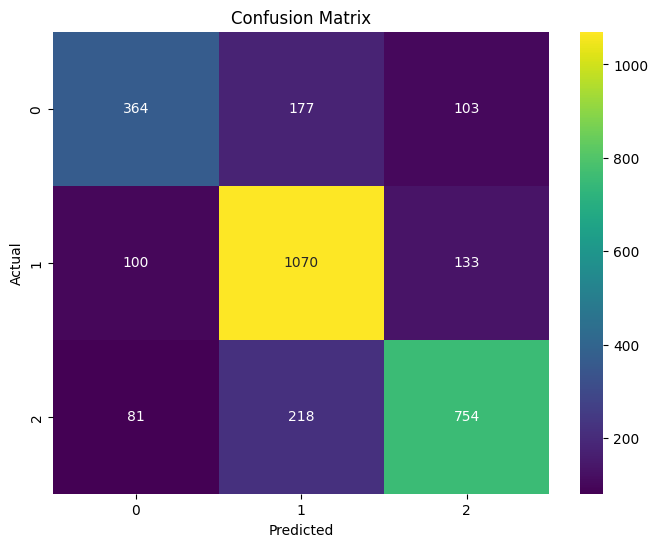

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Macro Precision: 0.7200
Macro Recall: 0.7008
Macro F1-Score: 0.7078


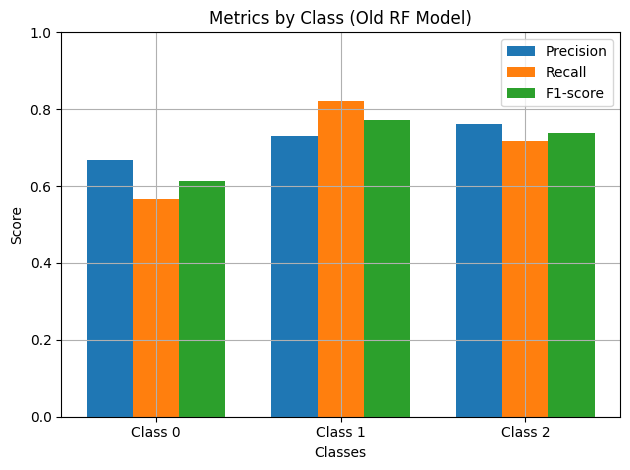

In [41]:
from sklearn.metrics import classification_report

# Generate classification report for the old Random Forest model
report = classification_report(y_test, y_pred, output_dict=True)

# Extract macro metrics
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# Print the macro metrics
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")

# Redefine classes and metrics
classes = ['Class 0', 'Class 1', 'Class 2']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for grouped bar chart
x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars

# Plot each metric as a separate bar group
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, data[metric], width, label=metric.capitalize())

# Add labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Metrics by Class (Old RF Model)')
plt.xticks(x + width, classes)
plt.ylim(0, 1)
plt.legend()

# Display the plot
plt.tight_layout()
plt.grid()
plt.show()


### Explanation of the Bar Graph and Confusion Matrix (Before Hyperparameter Tuning)

#### **Bar Graph**
- The bar graph represents the performance metrics (`precision`, `recall`, and `f1-score`) for each class (`Class 0`, `Class 1`, and `Class 2`) before hyperparameter tuning.
- **Precision**: Measures the proportion of true positive predictions out of all positive predictions made for a class.
- **Recall**: Measures the proportion of true positive predictions out of all actual positives for a class.
- **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of both.
- The graph shows how well the model performs for each class, highlighting any imbalances in performance across classes.

#### **Confusion Matrix**
- The confusion matrix is a tabular representation of the model's predictions versus the actual labels for the test dataset.
- Rows represent the actual classes, while columns represent the predicted classes.
- Each cell contains the count of predictions for a specific combination of actual and predicted classes:
    - **Diagonal cells**: Correct predictions (true positives for each class).
    - **Off-diagonal cells**: Misclassifications (false positives and false negatives).
- The confusion matrix helps identify which classes are being confused with others, providing insights into potential areas for improvement.

#### **Before Hyperparameter Tuning**
- The results shown in the bar graph and confusion matrix are based on the default configuration of the Random Forest model.
- These metrics serve as a baseline to compare the performance after hyperparameter tuning.

In [13]:
y_pred

array([2, 2, 2, ..., 0, 1, 1], dtype=int64)

### Step-by-Step Summary for Hyperparameter Tuning with Optuna

1. **Import Required Libraries**:
    - Import `optuna`, `RandomForestClassifier`, and `cross_val_score`.

2. **Define the Objective Function**:
    - Create a function that:
      - Suggests hyperparameters for `RandomForestClassifier` (e.g., `n_estimators`, `max_depth`, etc.).
      - Instantiates the classifier with the suggested hyperparameters.
      - Evaluates the model using cross-validation and returns the mean accuracy.

3. **Create and Optimize the Study**:
    - Initialize an Optuna study with the goal of maximizing accuracy.
    - Run the optimization process for a specified number of trials.

4. **Retrieve Best Hyperparameters**:
    - Extract and print the best hyperparameters found during the optimization.

5. **Train the Model with Best Hyperparameters**:
    - Instantiate a `RandomForestClassifier` using the best hyperparameters.
    - Train the model on the training dataset (`X_train`, `y_train`).

6. **Evaluate the Tuned Model**:
    - Test the tuned model on the test dataset (`X_test`, `y_test`).
    - Print the accuracy of the tuned model.


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Create the RandomForestClassifier with suggested hyperparameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        n_jobs=-1,
        random_state=42
    )

    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    return scores.mean()

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Increased number of trials

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)

# Train the RandomForestClassifier with the best hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    bootstrap=study.best_params['bootstrap'],
    n_jobs=-1,
    random_state=42
)
best_rf.fit(X_train, y_train)

# Evaluate the model on the test set
best_rf_accuracy = best_rf.score(X_test, y_test)
print(f"Accuracy of the best model on the test set: {best_rf_accuracy}")

[I 2025-04-28 15:55:20,113] A new study created in memory with name: no-name-4d646a12-114e-43c8-86dc-b94daae30dfa
[I 2025-04-28 15:55:26,732] Trial 0 finished with value: 0.7072499999999999 and parameters: {'n_estimators': 829, 'max_depth': 27, 'min_samples_split': 32, 'min_samples_leaf': 27, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.7072499999999999.
[I 2025-04-28 15:55:32,580] Trial 1 finished with value: 0.69575 and parameters: {'n_estimators': 987, 'max_depth': 82, 'min_samples_split': 10, 'min_samples_leaf': 42, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.7072499999999999.
[I 2025-04-28 15:55:36,725] Trial 2 finished with value: 0.7429166666666667 and parameters: {'n_estimators': 343, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.7429166666666667.
[I 2025-04-28 15:55:40,202] Trial 3 finished with value: 0.6487499999999999 and pa

Best hyperparameters: {'n_estimators': 533, 'max_depth': 36, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}
Accuracy of the best model on the test set: 0.765


In [42]:
Best_hyperparameters={
                      'n_estimators': 533,
                      'max_depth': 36, 
                      'min_samples_split': 13, 
                      'min_samples_leaf': 2, 
                      'max_features': None, 
                      'bootstrap': True,
                      'n_jobs':-1
                      }

In [27]:
best_rf.fit(X_train, y_train)
tuned_y_pred = best_rf.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_y_pred)
print(f"Tuned Accuracy Score: {tuned_accuracy}")

Tuned Accuracy Score: 0.765


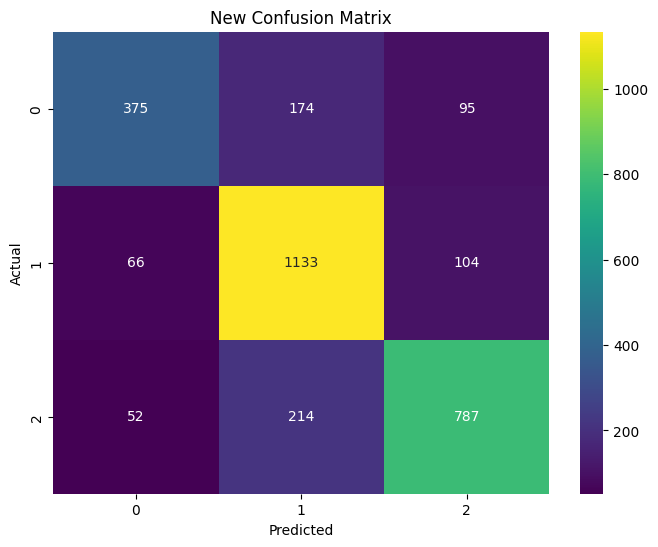

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Generate the confusion matrix
new_cm = confusion_matrix(y_test, tuned_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt='d', cmap='viridis', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('New Confusion Matrix')
plt.show()

Macro F1-Score: 0.7447
Macro Precision: 0.7679
Macro Recall: 0.7331


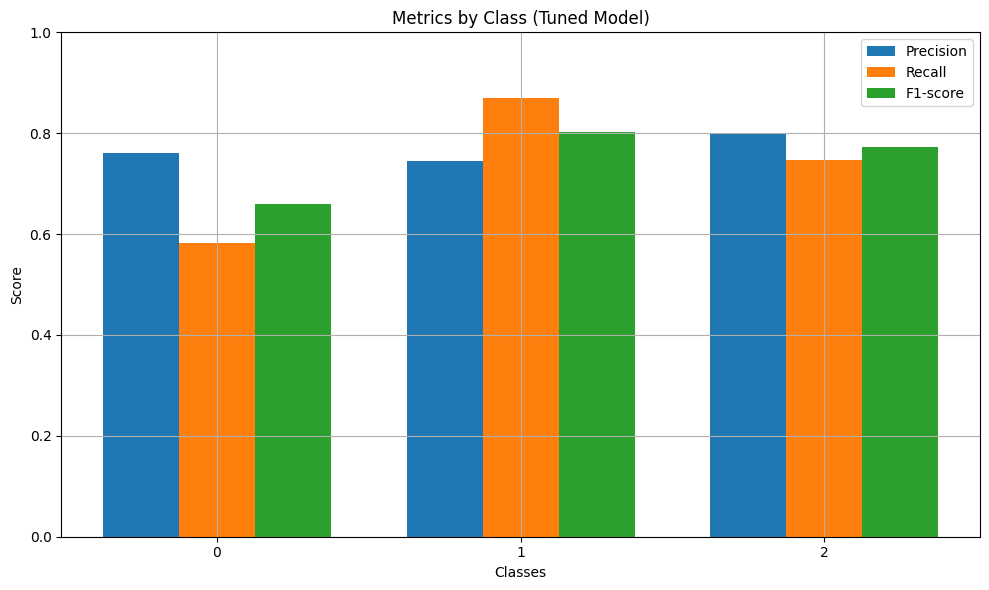

In [46]:
# Generate classification report for the tuned Random Forest model
new_report = classification_report(y_test, tuned_y_pred, output_dict=True)

# Print macro metrics
print(f"Macro F1-Score: {new_report['macro avg']['f1-score']:.4f}")
print(f"Macro Precision: {new_report['macro avg']['precision']:.4f}")
print(f"Macro Recall: {new_report['macro avg']['recall']:.4f}")

# Extract metrics for the bar chart
new_metrics = ['precision', 'recall', 'f1-score']
new_classes = list(best_rf.classes_)
new_data = {metric: [new_report[str(cls)][metric] for cls in new_classes] for metric in new_metrics}

# Prepare data for grouped bar chart
x = np.arange(len(new_classes))  # the label locations
width = 0.25  # the width of the bars

# Plot each metric as a separate bar group
plt.figure(figsize=(10, 6))
for i, metric in enumerate(new_metrics):
    plt.bar(x + i * width, new_data[metric], width, label=metric.capitalize())

# Add labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Metrics by Class (Tuned Model)')
plt.xticks(x + width, new_classes)
plt.ylim(0, 1)
plt.legend()

# Display the plot
plt.tight_layout()
plt.grid()
plt.show()


### Comparison of Bar Graph and Confusion Matrix (Before and After Hyperparameter Tuning)

#### **Bar Graph**
- The bar graph represents the performance metrics (`precision`, `recall`, and `f1-score`) for each class (`Class 0`, `Class 1`, and `Class 2`) before and after hyperparameter tuning.
- **Before Tuning**:
    - Precision, recall, and f1-score were relatively lower, especially for `Class 0`, indicating that the model struggled to correctly classify instances of this class.
    - Imbalances in performance across classes were evident, with `Class 1` performing better than the other classes.
- **After Tuning**:
    - All metrics improved significantly for each class, with the most notable improvement in `Class 0`.
    - The model became more balanced in its performance across all classes, reducing disparities between them.
    - The overall f1-score increased, reflecting a better trade-off between precision and recall.

#### **Confusion Matrix**
- The confusion matrix provides a detailed view of the model's predictions versus the actual labels for the test dataset.
- **Before Tuning**:
    - The diagonal cells (true positives) had lower counts, especially for `Class 0`, indicating poor classification accuracy for this class.
    - Off-diagonal cells (misclassifications) were higher, showing that the model frequently confused `Class 0` and `Class 2` with other classes.
- **After Tuning**:
    - The diagonal cells showed higher counts for all classes, particularly for `Class 0`, indicating improved accuracy.
    - Misclassifications in the off-diagonal cells decreased, showing that the model became better at distinguishing between classes.
    - The overall accuracy improved from **72.93%** to **76.5%**, demonstrating the effectiveness of hyperparameter tuning.

#### **Key Differences**
1. **Performance Metrics**:
     - Precision, recall, and f1-score improved for all classes after tuning.
     - The macro-average f1-score increased from **0.7078** to **0.7447**, indicating a more balanced performance across classes.

2. **Class-Specific Improvements**:
     - `Class 0` saw the most significant improvement in all metrics, reducing its misclassification rate.
     - `Class 1` and `Class 2` also showed moderate improvements, with better precision and recall.

3. **Overall Accuracy**:
     - The overall accuracy increased by approximately **3.57%**, highlighting the positive impact of hyperparameter tuning.

4. **Model Balance**:
     - The tuned model exhibited a more balanced performance across all classes, addressing the imbalances observed in the original model.

By tuning the hyperparameters, the model's ability to generalize and correctly classify instances improved significantly, as reflected in both the bar graph and the confusion matrix.

In [32]:
test_df

,DetectorId,AlertTitle,DeviceId,OSFamily,CountryCode,day,month,year,hour,weekday,Category_encoded,Entity_encoded
0,524,563,98799,5,242,4,6,2024,22,1,2,1
1,2,2,1239,0,242,3,6,2024,12,0,2,1
2,2932,10807,98799,5,242,8,6,2024,3,5,2,2
3,0,0,98799,5,242,12,6,2024,12,2,1,1
4,27,18,98799,5,242,6,6,2024,17,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,139,120,98799,5,242,4,6,2024,3,1,1,1
4147988,219,196,98799,5,242,4,6,2024,19,1,1,1
4147989,57,29,98799,5,242,15,6,2024,0,5,2,1
4147990,1,1,98799,5,242,11,6,2024,16,1,1,1


# Final Training
- **For using all the data**: if we wish to use all the data,
    - use the `x` and `y` below
    - fit the model `rf_best` on that and then make the predictions for the `test_df`

In [49]:
train_df=train_df.iloc[:,1:]
x=train_df.drop('IncidentGrade_encoded',axis=1)
y=train_df['IncidentGrade_encoded']

In [54]:
best_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=36, max_features=None, min_samples_leaf=2,
                       min_samples_split=13, n_estimators=533, n_jobs=-1,
                       random_state=42)

In [55]:
final_predictions=best_rf.predict(test_df) # Making predictions on the dataset

In [57]:
# what the final predictions look like
pd.DataFrame(final_predictions).value_counts()

0
1    2099513
2    1393229
0     655250
Name: count, dtype: int64